This is a sample dataset which tracks a fictional telco company's customer churn based on a variety of possible factors. I got it from this URL https://community.ibm.com/accelerators/catalog/content/Customer-churn. 
The Churn column indicates whether or not the customer left within the last month. Other columns include tensure, personal information, the charging information, and the services each customer has. 

The dataset will include only 3 numerical variables as follows:

1) Tenure(Number of months the customer has stayed with the company)

2) MonthlyCharges(The amount charged to the customer monthly)

3) Total Charges(The total amount charged to the customer)

All other variables are Categorical.

Our target variable is Churn(Whether the customer churned or not (Yes or No)). We will predict the Churn rate.

I will do the following tasks on this customer churn dataset:
1. Retrieve data
2. Get summary of data attributes, such as the numbers of rows and columns, column list, data types, and missing value
3. Clean and prepare the data for EDA next step
4. Perform EDA
5. Perform Feature Engineering
6. Make 3 hypotheses according to the finding and insights gained from the steps above and testing one of the hypotheses
7. Conclusion on the dataset

# Retrieve data

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c129c1e46857438ab7d64de3f728d7e0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mb7rqyw5WcH_MFQbXyQoUumOLh-GY6h0zKDsjay6tfP8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_c129c1e46857438ab7d64de3f728d7e0.get_object(Bucket='courseramachinelearning-donotdelete-pr-wf6anbkewarwvw',Key='CustomerChurn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_raw = pd.read_csv(body)
df_raw.head()


,LoyaltyID,CustomerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Get Summary of Data Attributes

In [70]:
# number of rows and number of columns
df_raw.shape

(7043, 21)

In [71]:
# check data type of each column
df_raw.dtypes

LoyaltyID             int64
CustomerID           object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [72]:
#check missing data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LoyaltyID         7043 non-null   int64  
 1   CustomerID        7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Clean Data

In [73]:
df=df_raw.copy()
df.head()

,LoyaltyID,CustomerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# Check duplicated data
df.duplicated().sum()

0

In [75]:
# Replace blank with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [76]:
# Check missing value
df.isnull().sum()

LoyaltyID            0
CustomerID           0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [77]:
# Convert data type of column Total Charges to float. Then,  replace the null value in this column with mean value.
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)
df.isnull().sum()

LoyaltyID           0
CustomerID          0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [78]:
# Drop unnecessary columns LoytaltyID and Customer ID. Keep a copy of original dataframe and make a new copy of the dataframe
df=df.drop(['LoyaltyID', 'CustomerID'], axis=1)

In [79]:
df.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [81]:
# Check range for the numeric columns 'Tenure', 'MonthlyCharges', 'TotalCharges'
num_desc = df.describe()
num_desc.loc['range'] = num_desc.loc['max'] - num_desc.loc['min']
num_desc.rename({'50%': 'median'}, inplace=True)
num_desc

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
median,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000
range,72.000000,100.500000,8666.000000


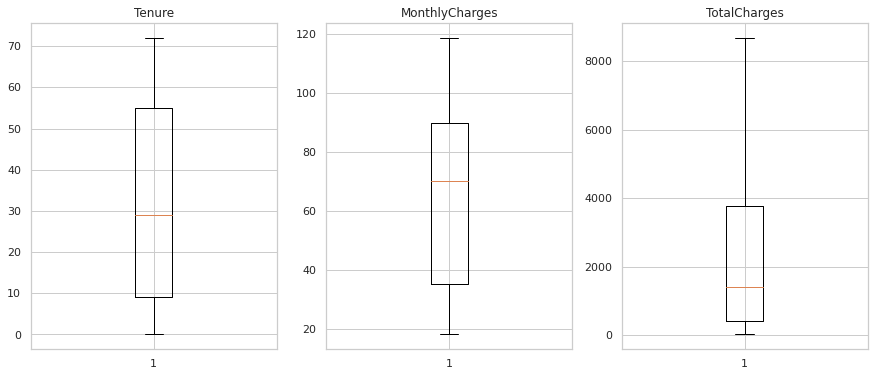

In [83]:
#check outliers of numberic columns using boxplot
col = df.columns
col_num = [col for col in col if df[col].dtype != object]
ig, ax = plt.subplots(1,3, figsize=(15, 6))

for i, col in enumerate(col_num):
    ax[i].boxplot(df[col]) 
    ax[i].set_title(col)

Tenure is positively skewed as mean is greater than median
MonthlyCharges is negatively skewed as mean is lower than median
TotalCharges is positively skewed as mean is greater than median 
But there are no outliers.

In [84]:
df.describe(include='object')

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


# EDA

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

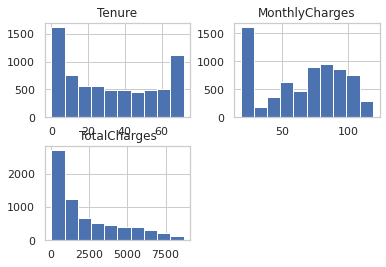

In [49]:
df.hist()

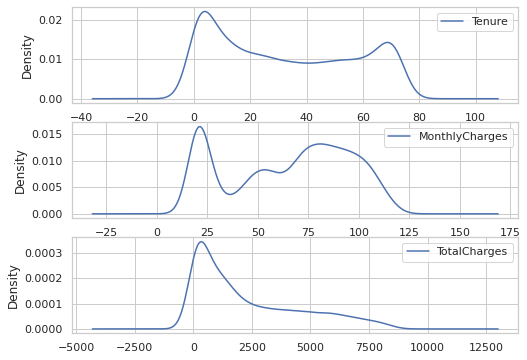

In [50]:
fig, axes = plt.subplots(3,1 ,figsize=(8,6))

for i,c in enumerate(col_num):
    f = df[[c]].plot(kind = 'kde', ax=axes[i])

In [201]:
# Change Yes/No to yes/no, then change again to numbers 1/0 in columns 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'

# df.SeniorCitizen = df.SeniorCitizen.str.lower().apply(lambda x: 1 if 'yes' in x else 0)
# df.Partner = df.Partner.str.lower().apply(lambda x: 1 if 'yes' in x else 0)
# df.Dependents= df.Dependents.str.lower().apply(lambda x: 1 if 'yes' in x else 0)
# df.PhoneService= df.PhoneService.str.lower().apply(lambda x: 1 if 'yes' in x else 0)
# df.PaperlessBilling= df.PaperlessBilling.str.lower().apply(lambda x: 1 if 'yes' in x else 0)
# df.head(10)

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No
2,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes
5,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,Yes
6,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,No
7,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,No
8,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,Yes
9,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,No


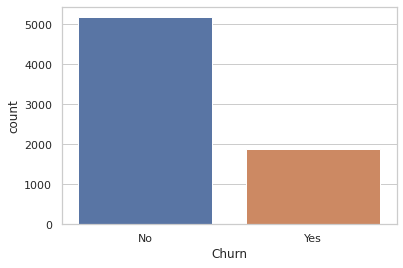

In [20]:
countplot = sns.countplot(x="Churn",data=df)